In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [3]:
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

In [4]:
skf = StratifiedKFold(n_splits=5)

In [7]:
# Initialize lists to store AUROC and average precision scores for each fold
rocs = []
prcs = []

# Loop through each fold in stratified cross-validation
for train_index, test_index in skf.split(features, labels):
    # Split data into training and test sets for the current fold
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Create and fit logistic regression model with a very high C value to simulate no regularization
    model = LogisticRegression(penalty='l2', C=1e10, max_iter=10000)
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate AUROC and average precision for this fold
    fold_roc_auc = roc_auc_score(y_test, y_proba)
    fold_avg_precision = average_precision_score(y_test, y_proba)
    
    # Append results to lists
    rocs.append(fold_roc_auc)
    prcs.append(fold_avg_precision)

# Calculate the average AUROC and average precision across all folds
average_roc_auc = np.mean(rocs)
average_precision = np.mean(prcs)

# Report the results
print("Average AUROC across folds:", average_roc_auc)
print("Average Average Precision across folds:", average_precision)


C:\Users\USER_Admin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER_Admin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Average AUROC across folds: 0.7508556832694764
Average Average Precision across folds: 0.9054159380392527


In [8]:
# Hyperparameter values for C
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Initialize arrays to store AUROC and average precision scores
rocs = np.zeros(shape=(len(cc), 5))
prcs = np.zeros(shape=(len(cc), 5))

# Loop through each value of C
for idx, C_value in enumerate(cc):
    # Loop through each fold in stratified cross-validation
    for fold_idx, (train_index, test_index) in enumerate(skf.split(features, labels)):
        # Split data into training and test sets for the current fold
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        # Create and fit logistic regression model with L2 regularization
        model = LogisticRegression(penalty='l2', C=C_value, max_iter=10000, solver='saga')
        model.fit(X_train, y_train)
        
        # Predict probabilities for the positive class
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate AUROC and average precision for this fold
        fold_roc_auc = roc_auc_score(y_test, y_proba)
        fold_avg_precision = average_precision_score(y_test, y_proba)
        
        # Store the results in the arrays
        rocs[idx, fold_idx] = fold_roc_auc
        prcs[idx, fold_idx] = fold_avg_precision

# Compute the average AUROC and average average precision for each value of C
avg_rocs = np.mean(rocs, axis=1)
avg_prcs = np.mean(prcs, axis=1)

# Report the highest AUROC and average precision, along with the corresponding hyperparameters
best_roc_idx = np.argmax(avg_rocs)
best_prc_idx = np.argmax(avg_prcs)

print(f"Best C for AUROC: {cc[best_roc_idx]} with AUROC: {avg_rocs[best_roc_idx]}")
print(f"Best C for Average Precision: {cc[best_prc_idx]} with Average Precision: {avg_prcs[best_prc_idx]}")

Best C for AUROC: 10 with AUROC: 0.6258237547892719
Best C for Average Precision: 10 with Average Precision: 0.8354561020336794


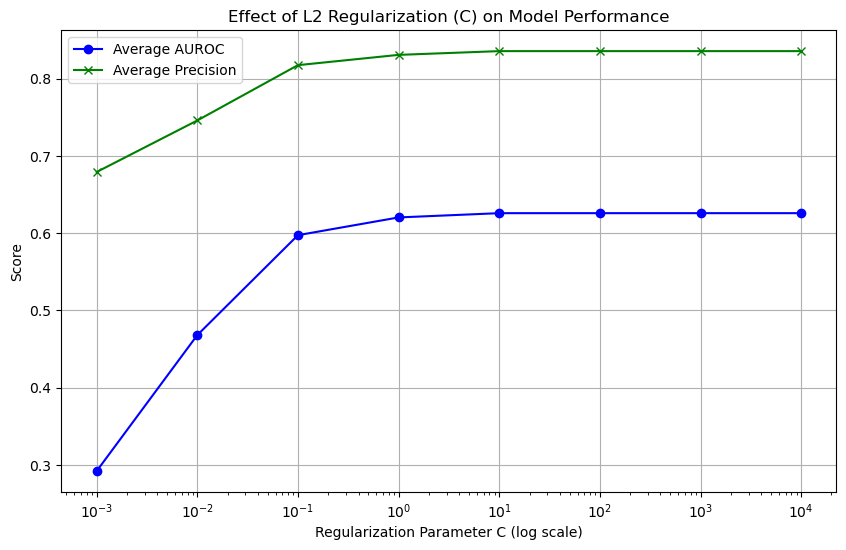

In [9]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogx(cc, avg_rocs, label='Average AUROC', marker='o', color='b')
plt.semilogx(cc, avg_prcs, label='Average Precision', marker='x', color='g')
plt.xlabel('Regularization Parameter C (log scale)')
plt.ylabel('Score')
plt.title('Effect of L2 Regularization (C) on Model Performance')
plt.legend()
plt.grid(True)
plt.show()
